#### **Project Details**

**Guided Project**

**Due Date:**  23/04/2025

**Contributors:** 
* Kyle Gregory Smith (577999)
* Caitlin Burnett (600330)
* Paul-Dieter Brandt (600948)
* Christoffel Martinus (577963)

## Data-Driven Student Support at BrightPath Academy (TBD)

### 1. Problem Statement
BrightPath Academy is committed to providing a well-rounded education that nurtures both academic excellence and personal growth. However, the school faces several challenges that hinder its ability to fully support every student. Currently, **the absence of real-time insights** means that struggling students may go unnoticed until its too late, if no form of intervention is administered to help them. Additionally, educators **lack targeted support strategies**, making it difficult to personalize academic assistance such as tutoring or mentoring.

While extracurricular activities are encouraged, **there is limited data** on their impact on academic performance, preventing educators from leveraging these programs to enhance student success. Moreover, the school collects vast amounts of student data, but **without a centralized, intuitive platform**, translating this information into actionable insights for student support remains a challenge.

To address these issues, BrightPath Academy is working to implement a **data-driven system** that identifies at-risk students in real time, enables educators to personalize interventions based on student needs, and provides clear insights into the impact of extracurricular involvement. By doing so, the academy **aims to enhance student outcomes, streamline academic support, and foster a more effective learning environment** for all learners.

### 2. Hypothesis


### 3. Importing Libraries & Data

In [70]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
import os

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

#Import csv files
df_original = pd.read_csv('../data/Student_performance_data.csv')               #.. goes up in the directory
df_original_copy = df_original.copy()                                           #Use throughout 

### 4. Understanding the data

#### Data Attributes:

In [ ]:
#Looking at a data smample
df_original.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [ ]:
#dataset shape and datatypes
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


In [ ]:
#Dataset statistics
df_original.describe().T 

,count,mean,std,min,25%,50%,75%,max
StudentID,2392.0,2196.500000,690.655244,1001.000000,1598.750000,2196.500000,2794.250000,3392.000000
Age,2392.0,16.468645,1.123798,15.000000,15.000000,16.000000,17.000000,18.000000
Gender,2392.0,0.510870,0.499986,0.000000,0.000000,1.000000,1.000000,1.000000
Ethnicity,2392.0,0.877508,1.028476,0.000000,0.000000,0.000000,2.000000,3.000000
ParentalEducation,2392.0,1.746237,1.000411,0.000000,1.000000,2.000000,2.000000,4.000000
StudyTimeWeekly,2392.0,9.771992,5.652774,0.001057,5.043079,9.705363,14.408410,19.978094
Absences,2392.0,14.541388,8.467417,0.000000,7.000000,15.000000,22.000000,29.000000
Tutoring,2392.0,0.301421,0.458971,0.000000,0.000000,0.000000,1.000000,1.000000
ParentalSupport,2392.0,2.122074,1.122813,0.000000,1.000000,2.000000,3.000000,4.000000
Extracurricular,2392.0,0.383361,0.486307,0.000000,0.000000,0.000000,1.000000,1.000000


### Observations/Insights


#### Dataset Shape and Data Types:

We loaded the dataset and explored the basic structure:

- The dataset has 2392 rows and 15 columns.
- The columns include categorical variables such as `gender`, `course`, etc.
- Some values may need cleaning or encoding (e.g., converting Yes/No to 1/0).
- Column names are suitable, no need to standardize.



### 5. Exploring the Data

#### A. Univariate Analysis:
Univariate analysis involves examining one variable at a time from the dataset. This helps us understand the distribution, central tendency (mean, median, mode), spread (standard deviation, range), and any patterns or anomalies present within a single feature

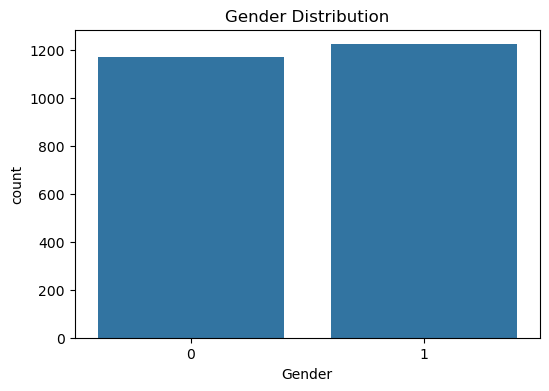

In [32]:
#Visualizing the gender distribution
plt.figure(figsize=(6,4))

sns.countplot(x='Gender', data=df_original)
plt.title('Gender Distribution')
plt.show()

<Axes: xlabel='GPA', ylabel='Count'>

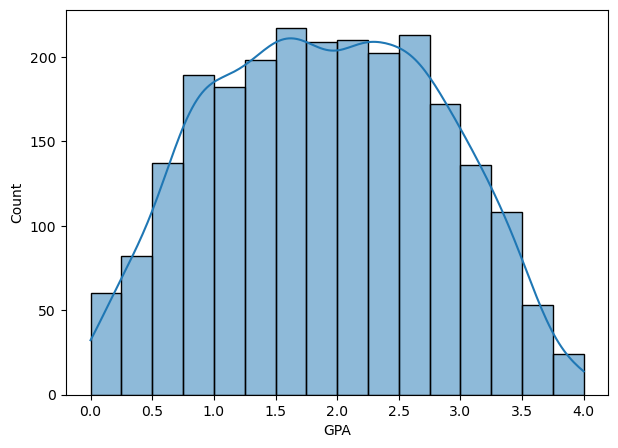

In [30]:
#Hstogram to visualize the distribution of the student marks
plt.figure(figsize=(7,5))

sns.histplot(df_original['GPA'], bins=np.arange(0, 4.25, 0.25), kde=True)


#### B. Bi-variate Analysis:
Bivariate analysis examines the relationship between two variables from the dataset — typically an independent (input) variable and a dependent (output) variable. This helps in identifying trends, correlations, and how input features may impact the target outcome



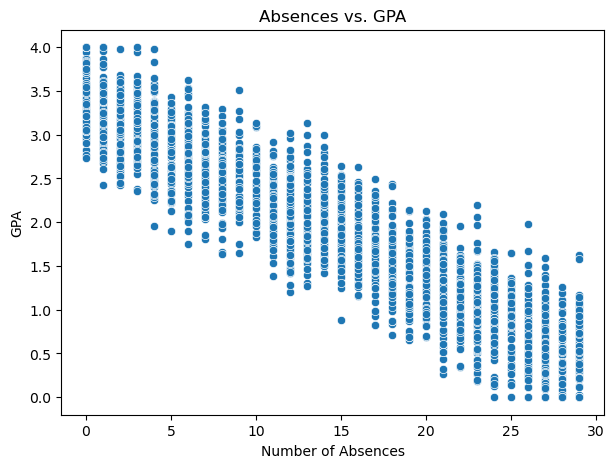

In [57]:
#Visualising the correlation between absences and GPA
plt.figure(figsize=(7, 5))
sns.scatterplot(x='Absences', y='GPA', data=df_original)
plt.title('Absences vs. GPA')
plt.xlabel('Number of Absences')
plt.ylabel('GPA')
plt.show()


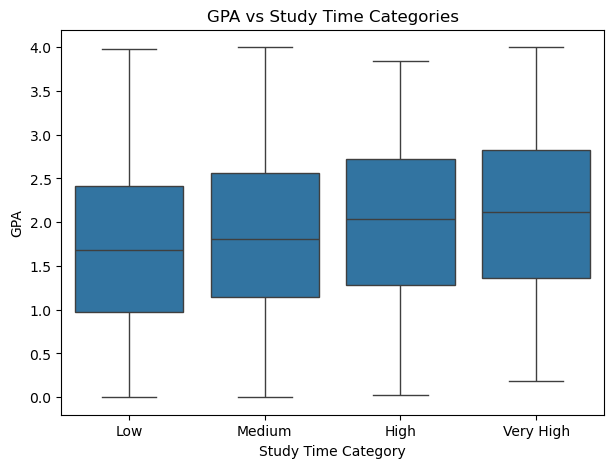

In [58]:
# Visualizing the relationship between GPA and Weekly Study Time
# Categorizing Study Time into bins
bins = [0, 5, 10, 15, 20]
labels = ['Low', 'Medium', 'High', 'Very High']
df_original['StudyTimeCategory'] = pd.Categorical(df_original['StudyTimeCategory'], categories=labels, ordered=True)

# Boxplot to compare GPA across Study Time categories
fig,ax= plt.subplots(figsize=(7,5))
sns.boxplot(x='StudyTimeCategory', y='GPA', data=df_original)
plt.title('GPA vs Study Time Categories')
plt.xlabel('Study Time Category')
plt.ylabel('GPA')
plt.show()


#### Insights and Correlations

1. **Gender Distribution**:
The gender distribution in the dataset is almost balanced, with equal representation of males and females. This provides a fair comparison for further analysis of GPA and other factors.

2. **Student Mark Distribution**:
The distribution of student marks shows a relatively normal pattern with a slight right skew. This indicates that most students are performing at the lower to mid-range marks, but there is a smaller group of students with higher scores."


3. **GPA vs. Study Time**:
The analysis suggests a positive correlation between weekly study time and GPA. Students who study more regularly tend to achieve higher GPAs, supporting the idea that consistent effort contributes to better academic performance.

4. **GPA vs. Absences**:
There seems to be a strong negative correlation between GPA and absences. As absences increase, GPA tends to decrease. This implies that attendance might play a role in academic success. 


### 6. Data Cleaning and Preprocessing

In [67]:
# Remove unnecessary columns
df_original.drop(columns=['StudentID', 'Ethnicity'], inplace=True)

# Check the result
print(df_original.columns)

Index(['Age', 'Gender', 'ParentalEducation', 'StudyTimeWeekly', 'Absences',
       'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports', 'Music',
       'Volunteering', 'GPA', 'GradeClass', 'StudyTimeCategory'],
      dtype='object')


In [64]:
# Check for missing values and duplicates
missing_values = df_original.isnull().sum()
duplicates = df_original[df_original.duplicated()]

#Print missing values
if missing_values.sum() > 0:
    print(missing_values[missing_values > 0].to_string())
else:
    print("No Missing Values Found")


# Print Duplicate Rows 
if duplicates.empty:
     print("No Duplicates Found")
else:
    print("Duplicates Found")
    print(duplicates)


No Missing Values Found
No Duplicates Found


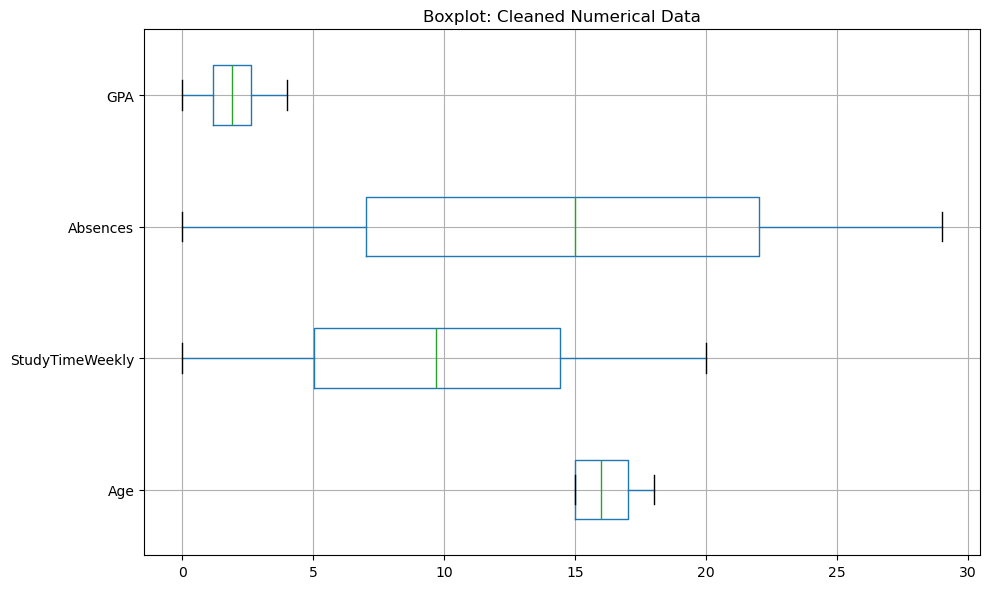

In [68]:
# Select only numerical (continuous) columns for the boxplot
numerical_columns = df_original.select_dtypes(include=['float64', 'int64']).columns
# Drop encoded categorical columns
columns_to_exclude = ['Gender', 'ParentalEducation', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GradeClass']
relevant_columns = [col for col in numerical_columns if col not in columns_to_exclude]

# Boxplot for cleaned numerical data
fig, ax = plt.subplots(figsize=(10, 6))
df_original[relevant_columns].boxplot(vert=0, ax=ax)
ax.set_title('Boxplot: Cleaned Numerical Data')
plt.tight_layout()
plt.show()


### 7. Feature Engineering

### 8. First Model Development

#### Evaluate First Model Metrics

### 9. Second Model Development

#### Evaluate Second Model Metrics

### 10. Comparison of Models

### 11. Web Application